In [13]:
# Import modules.
import torch
import random

import numpy as np

from trainer import Trainer
from torch import nn, optim
from hyperparameters import *
from torchinfo import summary
from torch.utils.data import DataLoader
from network import Discriminator, Generator
from torchvision import datasets, transforms

In [14]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [15]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [16]:
# Set data transform.
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [17]:
# Get dataset.
train_data = datasets.MNIST(
    root=DATASET_PATH,
    train=True,
    download=True,
    transform=transform,
)

# Create data loader.
train_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [18]:
# Set model.
D_MODEL = Discriminator(image_size=IMAGE_SIZE)
G_MODEL = Generator(z_dim=Z_SHAPE[0])

D_MODEL.to(device=device)
G_MODEL.to(device=device)

Generator(
  (block1): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (block3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv1): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), bias=False)
  (embedding): Embedding(10, 100)
  (tanh): Tanh()
)

In [19]:
# Print model summary.
print("Discriminator model summary:")
print(summary(D_MODEL, input_size=[(1, 1, IMAGE_SIZE, IMAGE_SIZE), (1,)], dtypes=[torch.int, torch.int]))
print()

print("Generator model summary:")
print(summary(G_MODEL, input_size=[(1, *Z_SHAPE), (1,)], dtypes=[torch.int, torch.int]))
print()

Discriminator model summary:
Layer (type:depth-idx)                   Output Shape              Param #
Discriminator                            [1, 1]                    --
├─Embedding: 1-1                         [1, 784]                  7,840
├─Sequential: 1-2                        [1, 64, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 64, 14, 14]           2,048
│    └─BatchNorm2d: 2-2                  [1, 64, 14, 14]           128
│    └─LeakyReLU: 2-3                    [1, 64, 14, 14]           --
├─Sequential: 1-3                        [1, 128, 7, 7]            --
│    └─Conv2d: 2-4                       [1, 128, 7, 7]            131,072
│    └─BatchNorm2d: 2-5                  [1, 128, 7, 7]            256
│    └─LeakyReLU: 2-6                    [1, 128, 7, 7]            --
├─Sequential: 1-4                        [1, 256, 4, 4]            --
│    └─Conv2d: 2-7                       [1, 256, 4, 4]            294,912
│    └─BatchNorm2d: 2-8               

In [20]:
# Set optimizer.
d_optimizer = optim.RAdam(D_MODEL.parameters(), lr=LEARNING_RATE, betas=(BETA1, BETA2))
g_optimier = optim.Adam(G_MODEL.parameters(), lr=LEARNING_RATE, betas=(BETA1, BETA2))

In [21]:
# Set loss function.
d_loss_fn = nn.BCELoss()
g_loss_fn = nn.BCELoss()

In [22]:
trainer = Trainer(data_loader=train_loader, batch_size=BATCH_SIZE, d_model=D_MODEL, g_model=G_MODEL, d_optimizer=d_optimizer, g_optimizer=g_optimier, d_loss_fn=d_loss_fn, g_loss_fn=g_loss_fn, device=device, z_shape=Z_SHAPE)

Epoch: 0 | Time: 39.783 | D Loss: 1.170 | G Loss: 0.855                              


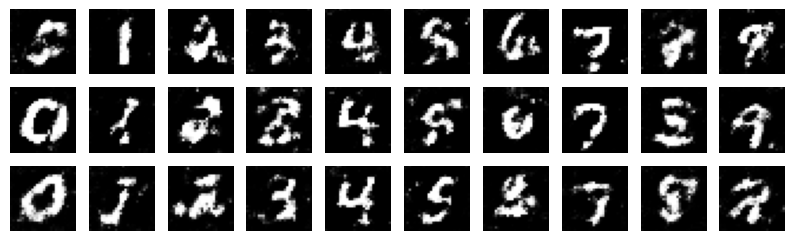

Epoch: 1 | Time: 40.449 | D Loss: 1.158 | G Loss: 0.867                              


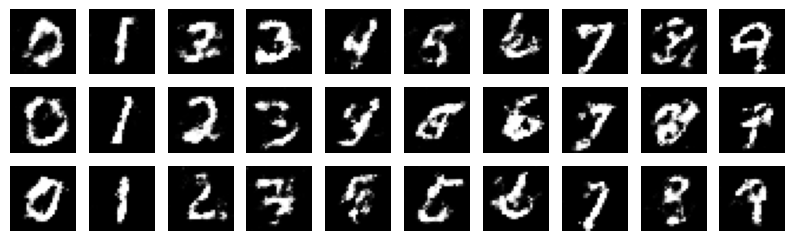

Epoch: 2 | Time: 35.407 | D Loss: 1.078 | G Loss: 0.968                              


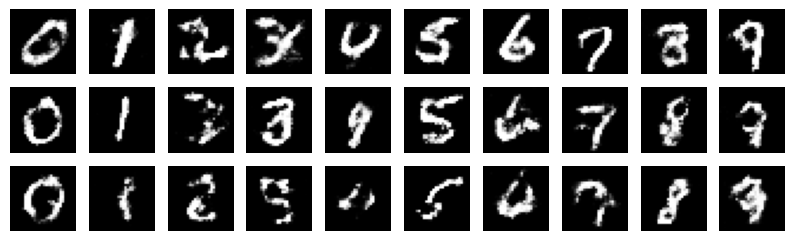

Epoch: 3 | Time: 34.486 | D Loss: 1.094 | G Loss: 0.984                              


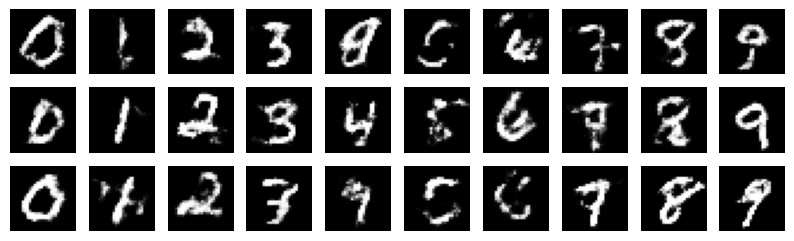

Epoch: 4 | Time: 34.780 | D Loss: 1.158 | G Loss: 0.940                              


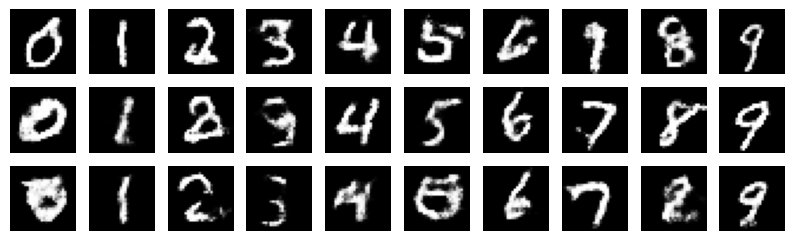

Epoch: 5 | Time: 35.934 | D Loss: 1.224 | G Loss: 0.885                              


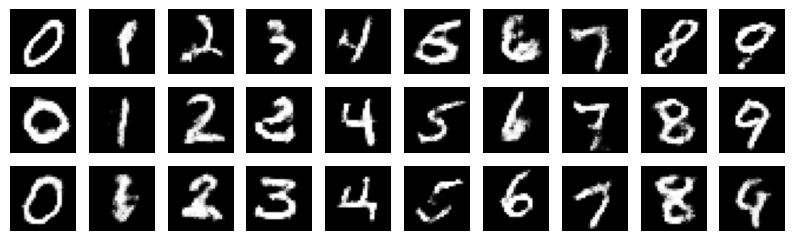

Epoch: 6 | Time: 36.575 | D Loss: 1.270 | G Loss: 0.838                              


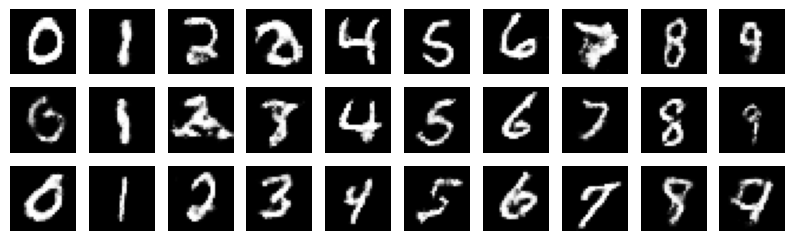

Epoch: 7 | Time: 37.894 | D Loss: 1.305 | G Loss: 0.804                              


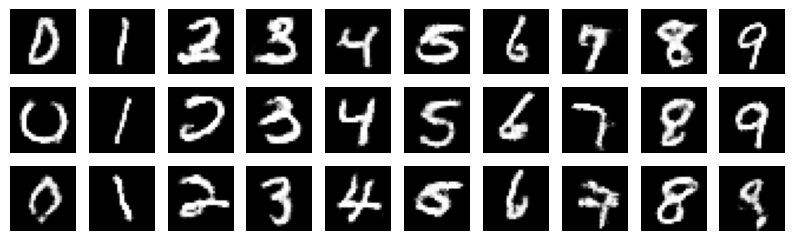

Epoch: 8 | Time: 39.964 | D Loss: 1.326 | G Loss: 0.781                              


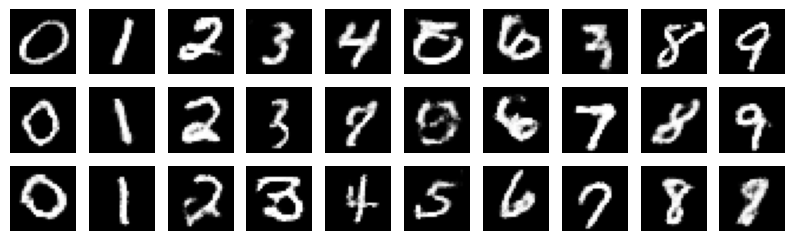

Epoch: 9 | Time: 40.636 | D Loss: 1.344 | G Loss: 0.765                              


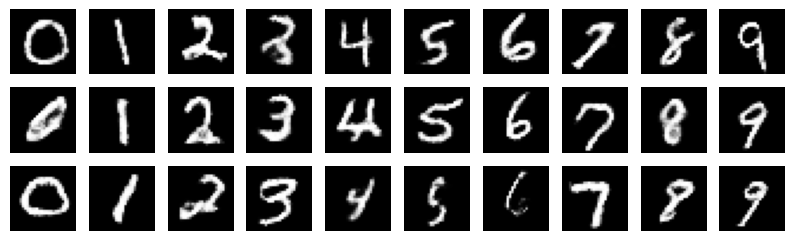

In [23]:
trainer.train(epochs=EPOCHS, gd_ratio=GD_RATIO, test=TEST_WHILE_TRAIN, test_num=TEST_NUM)

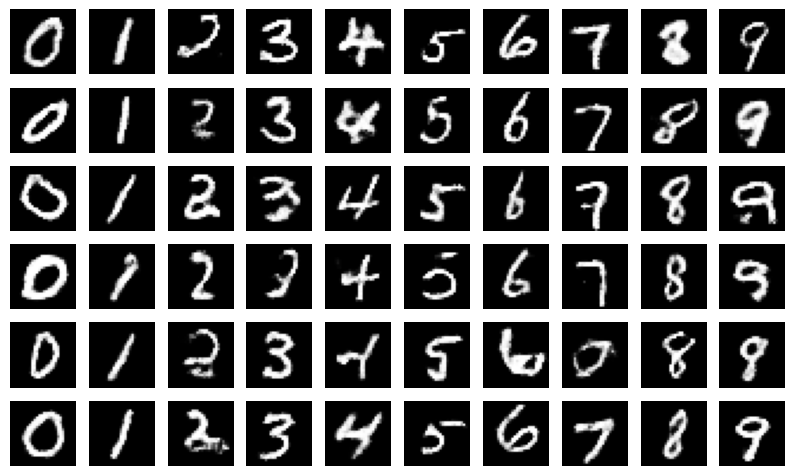

In [24]:
trainer.test(num=60)